In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Gráficos

## Se carga el dataset

In [6]:
df = pd.read_excel("../data/data_graphics.xlsx")

In [7]:
df.dtypes

Order Date       datetime64[ns]
Sneaker Name             object
Sale Price                int64
Retail Price              int64
Release Date     datetime64[ns]
Shoe Size               float64
Buyer Region             object
Brand                    object
Sub-brand                object
Product Line             object
Model                   float64
Version                  object
Height                   object
Collaboration            object
Color(s)                 object
Year                    float64
dtype: object

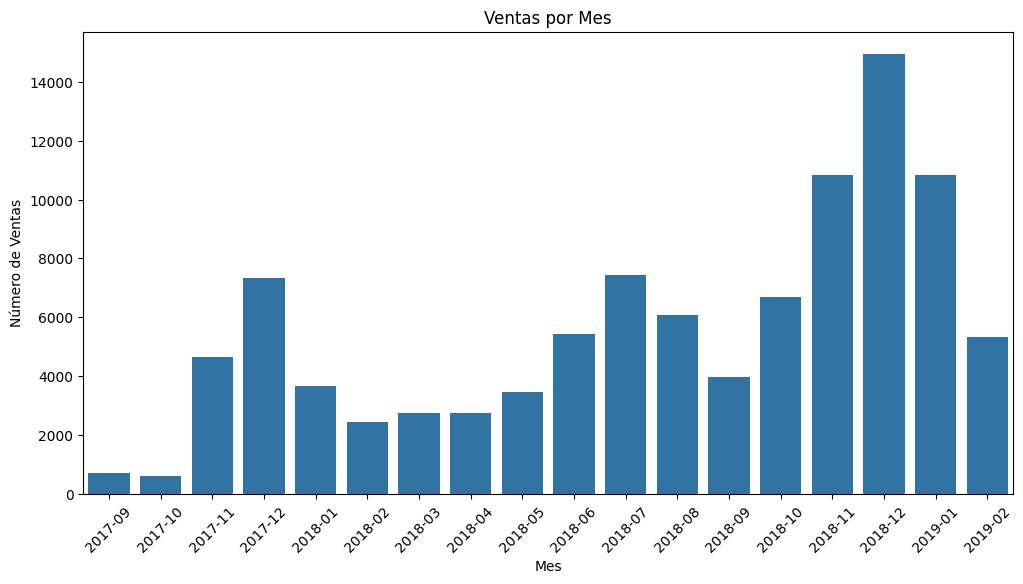

In [8]:
df['Order Month'] = df['Order Date'].dt.to_period('M')

monthly_sales = df['Order Month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_sales.index.astype(str), y=monthly_sales.values)
plt.xticks(rotation=45)
plt.title('Ventas por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Ventas')
plt.show()

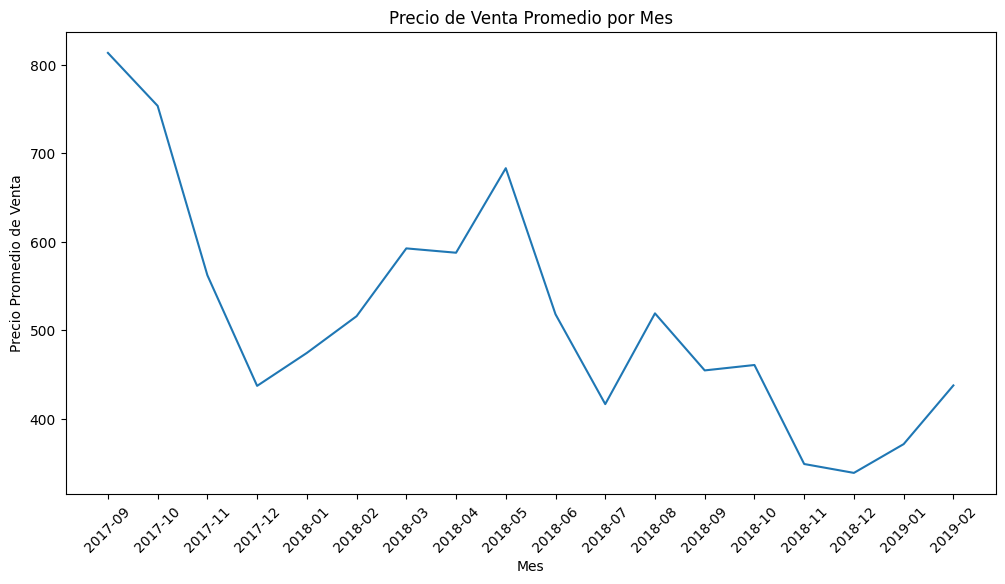

In [9]:
monthly_avg_price = df.groupby('Order Month')['Sale Price'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_avg_price.index.astype(str), y=monthly_avg_price.values)
plt.xticks(rotation=45)
plt.title('Precio de Venta Promedio por Mes')
plt.xlabel('Mes')
plt.ylabel('Precio Promedio de Venta')
plt.show()

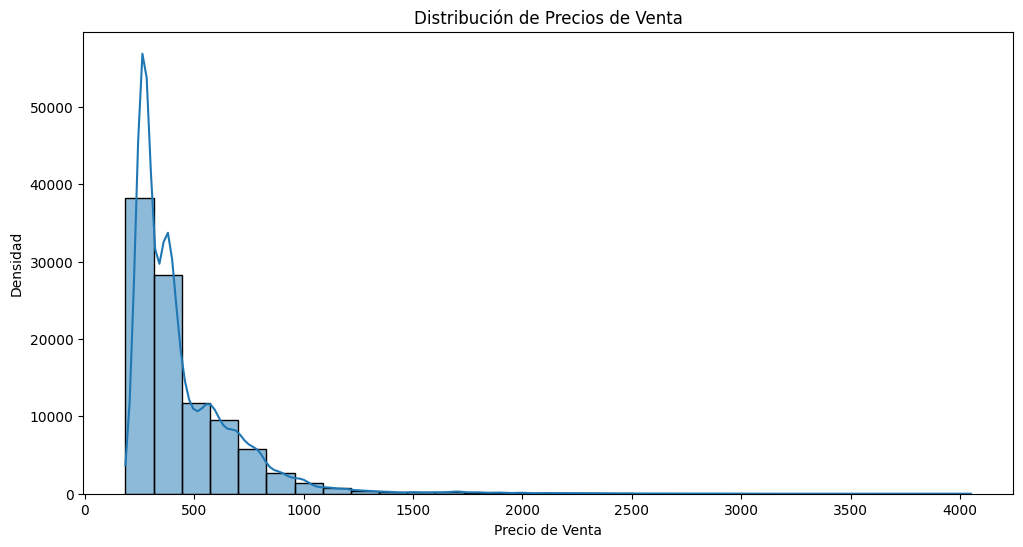

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Sale Price'], bins=30, kde=True)
plt.title('Distribución de Precios de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Densidad')
plt.show()

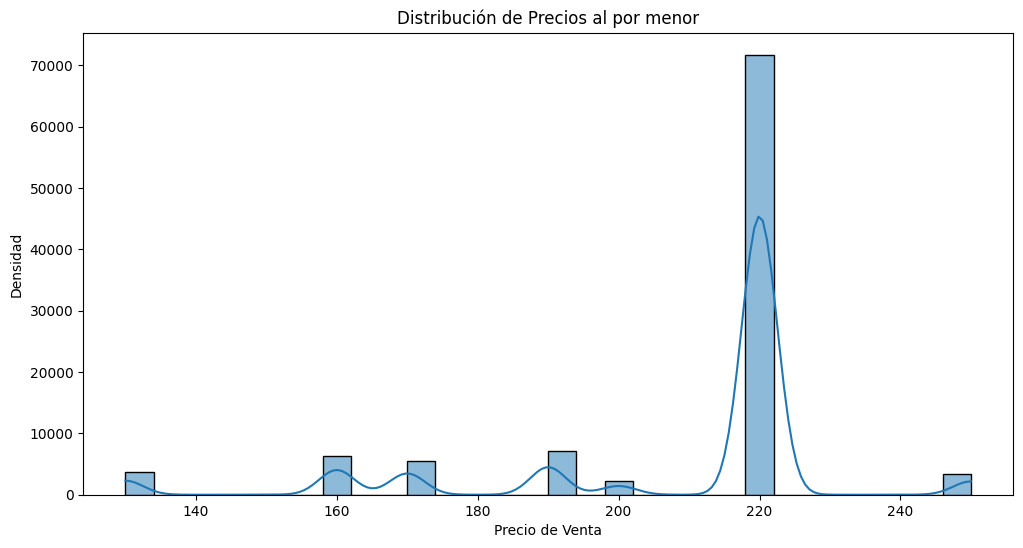

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Retail Price'], bins=30, kde=True)
plt.title('Distribución de Precios al por menor')
plt.xlabel('Precio de Venta')
plt.ylabel('Densidad')
plt.show()

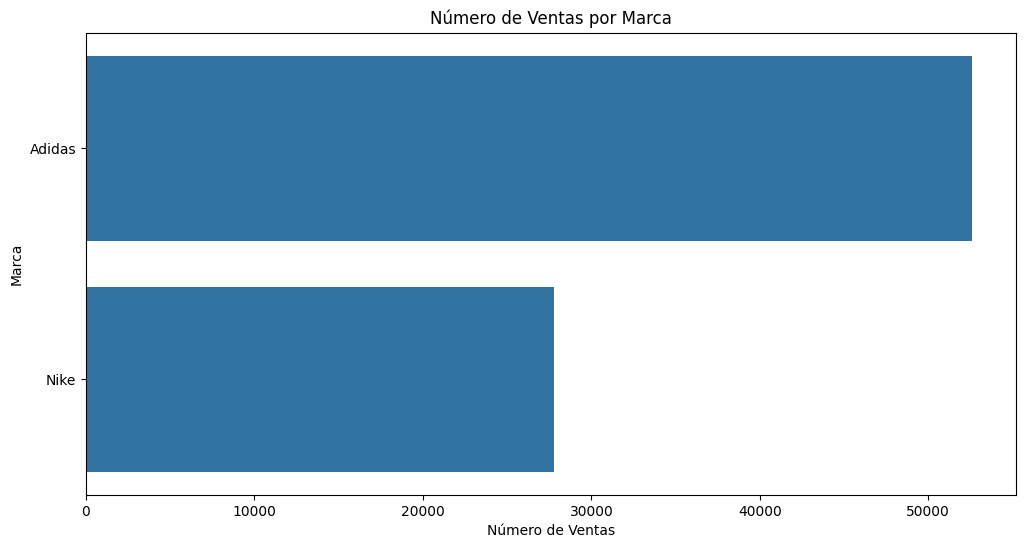

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Brand', data=df, order=df['Brand'].value_counts().index)
plt.title('Número de Ventas por Marca')
plt.xlabel('Número de Ventas')
plt.ylabel('Marca')
plt.show()

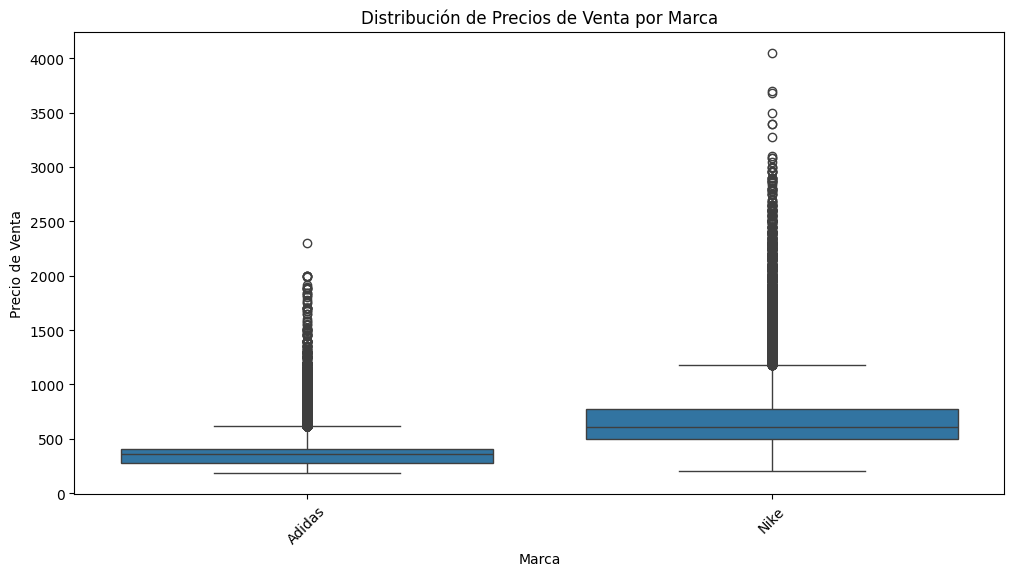

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='Sale Price', data=df)
plt.title('Distribución de Precios de Venta por Marca')
plt.xticks(rotation=45)
plt.xlabel('Marca')
plt.ylabel('Precio de Venta')
plt.show()

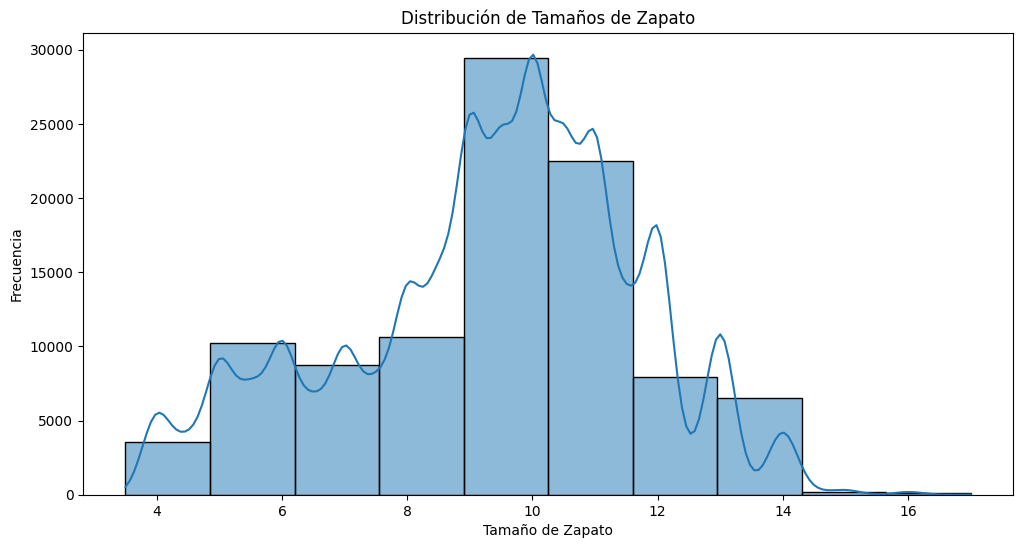

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Shoe Size'], bins=10, kde=True)
plt.title('Distribución de Tamaños de Zapato')
plt.xlabel('Tamaño de Zapato')
plt.ylabel('Frecuencia')
plt.show()

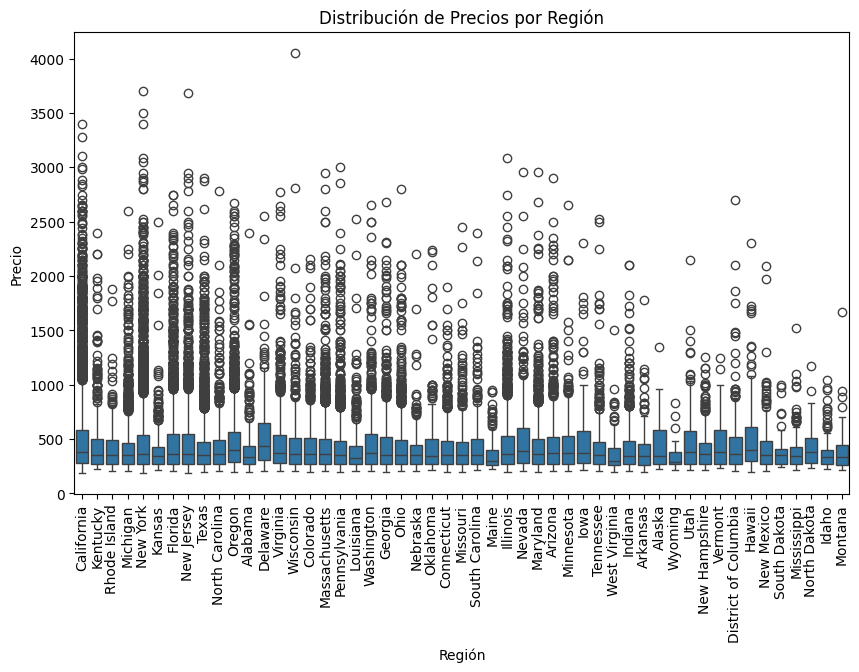

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Buyer Region', y='Sale Price', data=df)
plt.title('Distribución de Precios por Región')
plt.xlabel('Región')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.show()

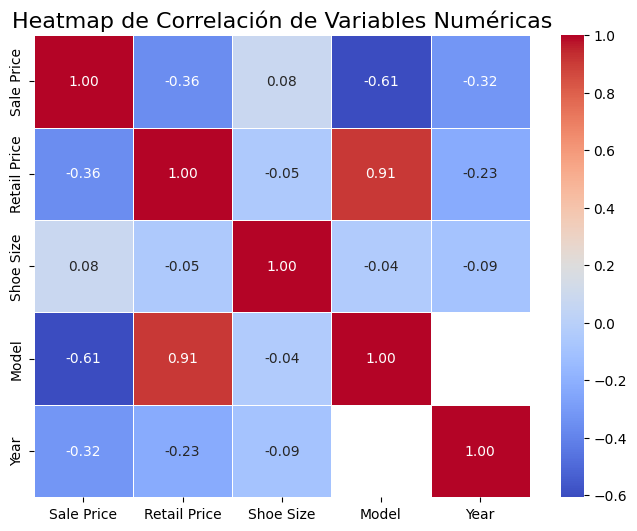

In [16]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap de Correlación de Variables Numéricas', fontsize=16)
plt.show()